In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

as mentioned in eda part 1 that this dataset is veg friendly and the ration is 90/10 
which is not a good dataset for the analysis purpose, so i manually added some non veg dishes 

for some states, as mention-
1. Tamilnadu = 30
2. Gujarat = 15
3. Andhra pradesh = 10
4. Karnataka = 10
5. Kerela = 6
6. Maharashtra = 15
7. Punjab = 20
8. Odisha = 10
9. rajasthan = 2
10. Uttar pradesh = 10
11. West Bengal = 10

and here is the final file for these dishes

In [15]:
non_veg = pd.read_csv('nonveg_all_state.csv')

In [16]:
non_veg.head()

,name,ingredients,diet,prep_time,cook_time,flavour,dish_type,state,region
0,chicken chettinad,"chicken, onion, tomato, pepper, curry leaves, ...",non vegetarian,40,80,spicy,main course,tamil nadu,south
1,mutton chettinad,"mutton, coconut, onion, garlic, ginger, masala...",non vegetarian,45,90,spicy,main course,tamil nadu,south
2,nattu kozhi kuzhambu,"country chicken, onion, tomato, chili, garlic,...",non vegetarian,35,80,spicy,main course,tamil nadu,south
3,meen kuzhambu,"fish, tamarind, onion, tomato, mustard, spices",non vegetarian,30,70,spicy,main course,tamil nadu,south
4,vanjaram fish fry,"seer fish, chili powder, turmeric, lemon juice...",non vegetarian,30,60,spicy,starter,tamil nadu,south


In [17]:
non_veg.shape

(138, 9)

Finally merge it with the cleaned dataset

In [18]:
veg_df = pd.read_csv('indian_food_cleaned.csv')
nonveg_df = pd.read_csv('nonveg_all_state.csv')

final_df = pd.concat([veg_df, nonveg_df], ignore_index=True)

final_df.to_csv('food_cleaned_2.csv', index=False)

In [19]:
df = pd.read_csv('food_cleaned_2.csv')

In [20]:
df.shape

(393, 9)

In [21]:
df['diet'] = df['diet'].astype('category')
df['flavour'] = df['flavour'].astype('category')

In [29]:
df['total_time'] = df['prep_time'] + df['cook_time']
df.insert(5, 'total_time', df.pop('total_time'))

In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         393 non-null    object  
 1   ingredients  393 non-null    object  
 2   diet         393 non-null    category
 3   prep_time    393 non-null    int64   
 4   cook_time    393 non-null    int64   
 5   total_time   393 non-null    int64   
 6   flavour      393 non-null    category
 7   dish_type    393 non-null    object  
 8   state        393 non-null    object  
 9   region       393 non-null    object  
dtypes: category(2), int64(3), object(5)
memory usage: 25.8+ KB


,prep_time,cook_time,total_time
count,393.000000,393.000000,393.000000
mean,34.419847,51.834606,86.254453
std,52.997442,27.177152,65.096956
min,5.000000,2.000000,10.000000
25%,10.000000,30.000000,50.000000
50%,27.000000,45.000000,70.000000
75%,35.000000,80.000000,115.000000
max,500.000000,120.000000,620.000000


UNIVARIATE ANALYSIS

1. Name

- drop 43 duplicate values

In [31]:
df['name'].nunique()

350

In [32]:
df[df['name'].duplicated()]


,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
296,fish fry,"fish, chili powder, turmeric, lemon juice, oil",non vegetarian,35,75,110,spicy,starter,gujarat,west
297,egg curry,"egg, onion, tomato, masala, oil",non vegetarian,30,70,100,spicy,main course,gujarat,west
299,prawn masala,"prawn, onion, tomato, chili, curry leaves, masala",non vegetarian,35,80,115,spicy,main course,gujarat,west
300,chicken biryani,"chicken, rice, onion, tomato, curd, masala",non vegetarian,40,90,130,spicy,main course,gujarat,west
302,mutton biryani,"mutton, rice, onion, masala, curd",non vegetarian,45,100,145,spicy,main course,gujarat,west
303,crab masala,"crab, onion, tomato, chili, garlic, masala",non vegetarian,40,85,125,spicy,main course,gujarat,west
305,prawn fry,"prawn, chili, turmeric, garlic, oil",non vegetarian,30,65,95,spicy,starter,gujarat,west
306,fish curry,"fish, tamarind, onion, tomato, mustard, spices",non vegetarian,35,85,120,spicy,main course,gujarat,west
312,prawn biryani,"prawn, rice, onion, tomato, mint, masala",non vegetarian,40,85,125,spicy,main course,karnataka,south
315,mutton curry,"mutton, onion, tomato, garlic, ginger, masala",non vegetarian,45,95,140,spicy,main course,karnataka,south


In [ ]:
# drop duplicates - keep first 
df = df.drop_duplicates(subset=['name'], keep='first')

print(df['name'].duplicated().sum())

0


In [51]:
df.shape

(350, 10)

2. Ingredients

In [38]:
df['ingredients'].str.split().str.len().describe()

#average 7 ingredients per dish

count    350.000000
mean       6.945714
std        2.230274
min        2.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       13.000000
Name: ingredients, dtype: float64

<Axes: ylabel='Frequency'>

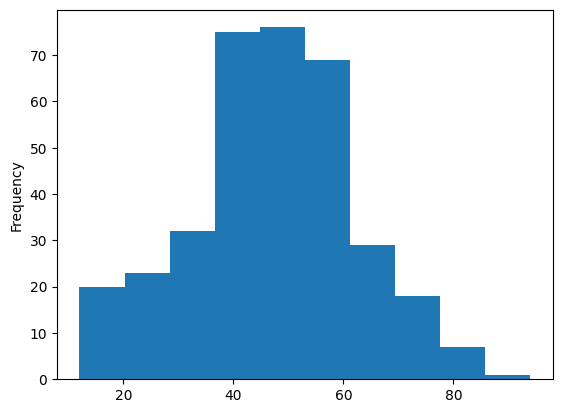

In [39]:
df['ingredients'].str.len().plot(kind='hist')

3. diet

- still veg friendly but not that much

In [40]:
df['diet'].value_counts()

diet
vegetarian        226
non vegetarian    124
Name: count, dtype: int64

In [ ]:
#percentage
round(df['diet'].value_counts(normalize=True)*100, 2)

diet
vegetarian        64.57
non vegetarian    35.43
Name: proportion, dtype: float64

<Axes: xlabel='diet'>

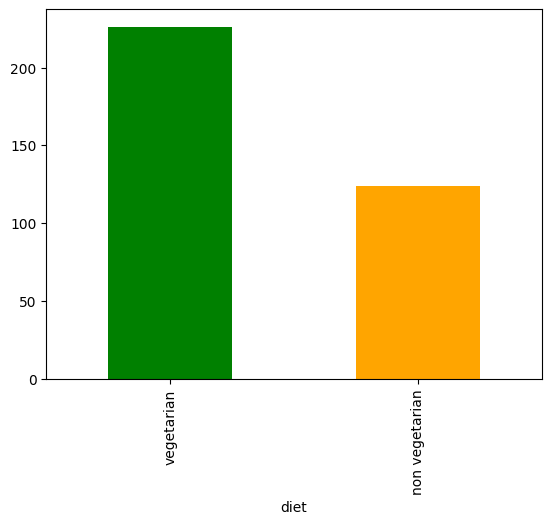

In [42]:
df['diet'].value_counts().plot(kind='bar', color=['green', 'orange'])

4. Prep time

- removed outlier > 150 

In [43]:
df['prep_time'].describe()

count    350.000000
mean      34.105714
std       56.127390
min        5.000000
25%       10.000000
50%       20.000000
75%       35.000000
max      500.000000
Name: prep_time, dtype: float64

<Axes: xlabel='prep_time'>

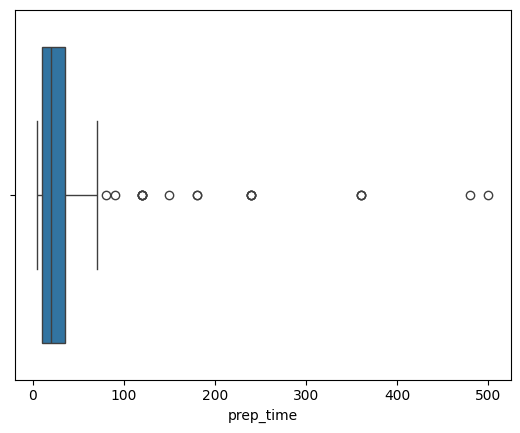

In [ ]:
sns.boxplot(x=df['prep_time'])

#outliers

In [52]:
df[df['prep_time'] >= 150]

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
29,Misti doi,"Milk, jaggery",vegetarian,480,30,510,sweet,dessert,west bengal,east
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,240,sweet,dessert,west bengal,east
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,240,sweet,main course,karnataka,south
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,300,sweet,dessert,andhra pradesh,south
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,285,sweet,dessert,manipur,north east
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,620,spicy,main course,punjab,north
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,270,spicy,main course,punjab,north
124,Attu,"Whole wheat flour, arhar dal, ginger, kala jee...",vegetarian,150,25,175,spicy,starter,andhra pradesh,south
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,450,spicy,starter,tamil nadu,south
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,450,spicy,starter,tamil nadu,south


In [53]:
df = df[df['prep_time'] <= 150]

In [54]:
df['prep_time'].describe()

count    339.000000
mean      25.241888
std       19.320879
min        5.000000
25%       10.000000
50%       20.000000
75%       35.000000
max      150.000000
Name: prep_time, dtype: float64

<Axes: xlabel='prep_time'>

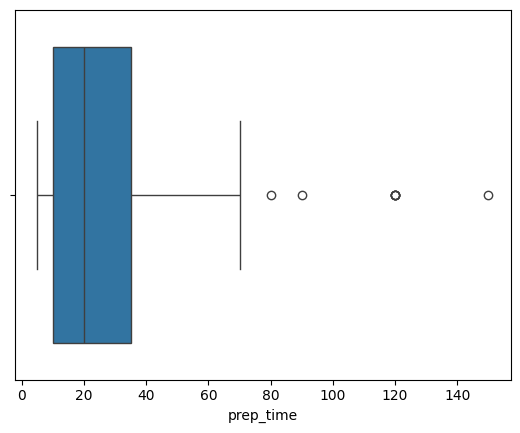

In [56]:
sns.boxplot(x=df['prep_time'])

#valid outliers


5. cook time

In [57]:
df['cook_time'].describe()

count    339.000000
mean      47.495575
std       25.925288
min        2.000000
25%       30.000000
50%       40.000000
75%       70.000000
max      120.000000
Name: cook_time, dtype: float64

<Axes: xlabel='cook_time'>

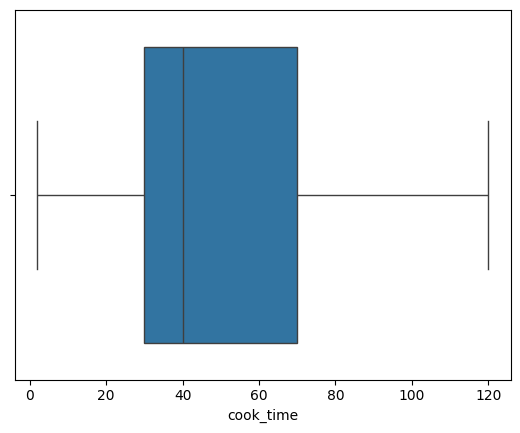

In [58]:
sns.boxplot(x=df['cook_time'])


6. flavour

In [ ]:
df['flavour'].value_counts()

#spicy dominate


flavour
spicy      223
sweet       84
unknown     28
bitter       4
Name: count, dtype: int64

<Axes: xlabel='flavour'>

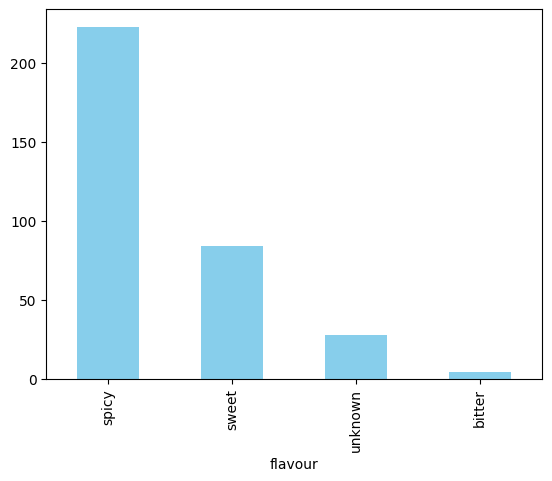

In [ ]:
df['flavour'].value_counts().plot(kind='bar', color='skyblue')

#valid values

<Axes: ylabel='count'>

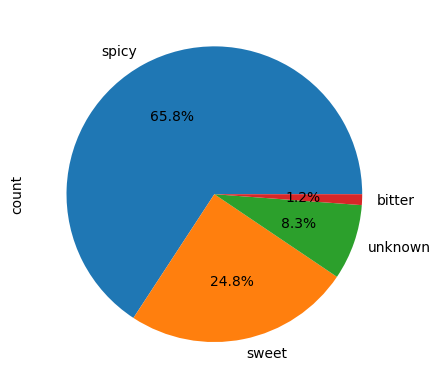

In [61]:
df['flavour'].value_counts().plot(kind= 'pie', autopct = '%0.1f%%')

7. dish type

In [ ]:
df['dish_type'].value_counts()

#main course dominate


dish_type
main course    187
dessert         81
starter         69
soup             2
Name: count, dtype: int64

In [ ]:
df[df['dish_type'] == 'soup']

# both crab rasam, chicken rasam are starter type dish 

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
275,crab rasam,"crab, tamarind, tomato, garlic, pepper, rasam ...",non vegetarian,30,65,95,spicy,soup,tamil nadu,south
276,chicken rasam,"chicken, tamarind, tomato, garlic, chili, rasa...",non vegetarian,30,65,95,spicy,soup,tamil nadu,south


In [ ]:
# change soup to starter
df.loc[df['dish_type'] == 'soup', 'dish_type'] = 'starter'


In [65]:
df['dish_type'].value_counts()

dish_type
main course    187
dessert         81
starter         71
Name: count, dtype: int64

<Axes: xlabel='dish_type'>

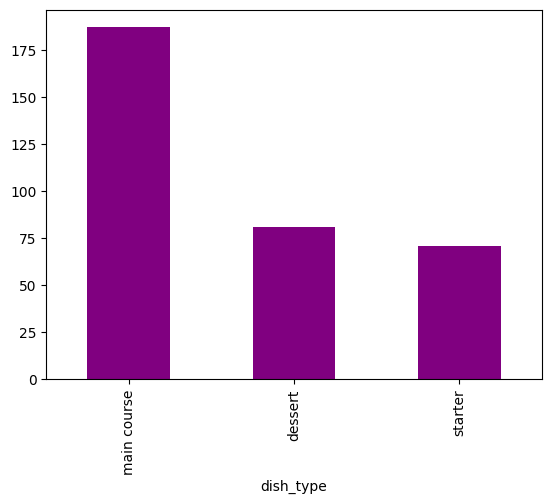

In [66]:
df['dish_type'].value_counts().plot(kind='bar', color='purple')

<Axes: ylabel='count'>

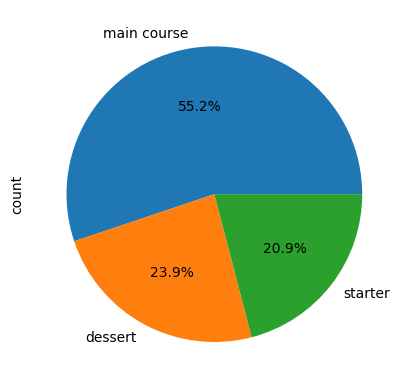

In [67]:
df['dish_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

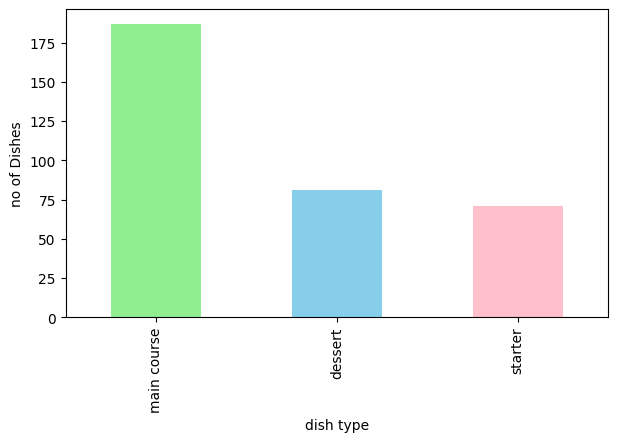

In [68]:
# dishes per category

df['dish_type'].value_counts().plot(kind='bar',color=['lightgreen', 'skyblue', 'pink'],figsize=(7,4))
plt.xlabel("dish type")
plt.ylabel("no of Dishes")
plt.show()

8. state

In [71]:
df['state'].nunique()    # 25
df['state'].value_counts().head(10)

state
tamil nadu        56
gujarat           44
punjab            43
maharashtra       42
west bengal       30
assam             21
andhra pradesh    20
uttar pradesh     18
kerala            13
odisha            10
Name: count, dtype: int64

<Axes: xlabel='state'>

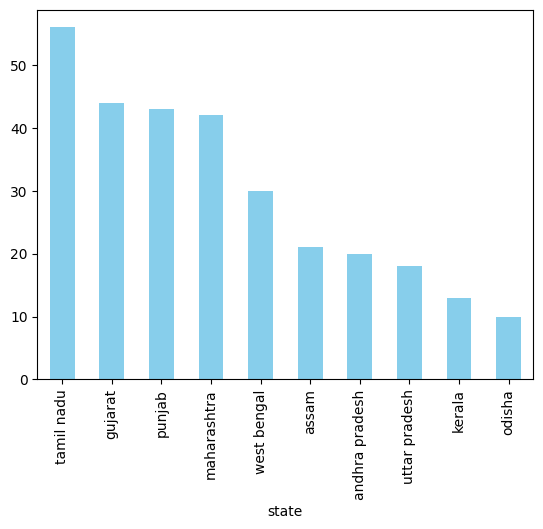

In [72]:
df['state'].value_counts().head(10).plot(kind='bar', color='skyblue')

9. Region

In [ ]:
df['region'].nunique()   


6

In [74]:
round(df['region'].value_counts(normalize=True)*100, 2)

region
south         30.68
west          28.91
north         20.65
east          11.80
north east     7.08
central        0.88
Name: proportion, dtype: float64

<Axes: xlabel='region'>

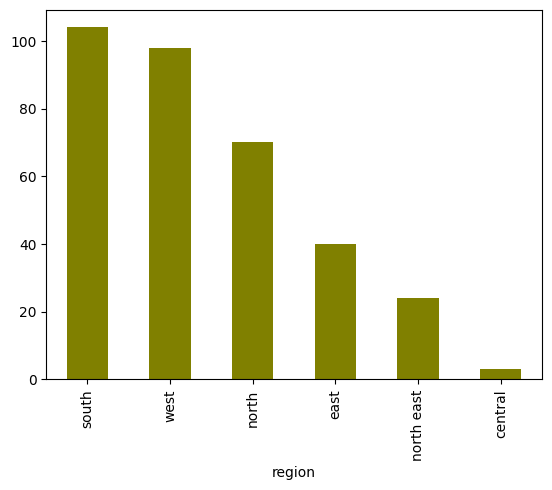

In [75]:
df['region'].value_counts().plot(kind='bar', color='olive')

<Axes: ylabel='count'>

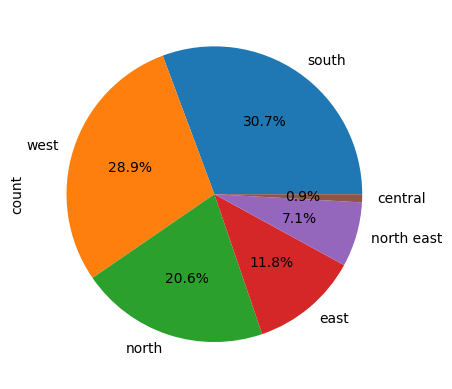

In [76]:
df['region'].value_counts().plot(kind='pie', autopct='%0.1f%%')

**BIVARIATE ANALYSIS**

In [79]:
#diet vs total_time
# diet vs region
# diet vs state
# diet vs flavour 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14704\3492322976.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

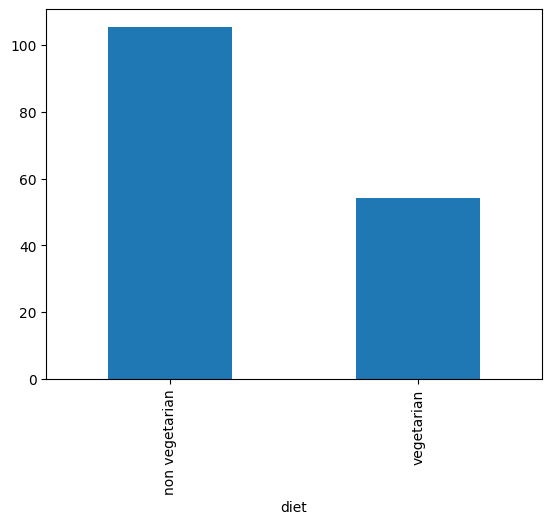

In [ ]:
# diet vs total_time
df.groupby('diet')['total_time'].mean().plot(kind='bar')

# logical difference, non veg takes more time

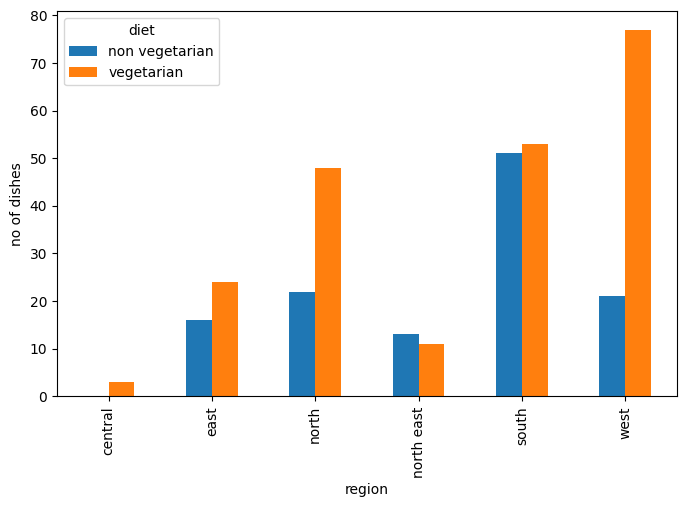

In [ ]:
# diet vs region
df.groupby('region')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()

# valid differences coz rajasthan, gujarat are veg dominant regions
# not satisfied with north region but its okay for now

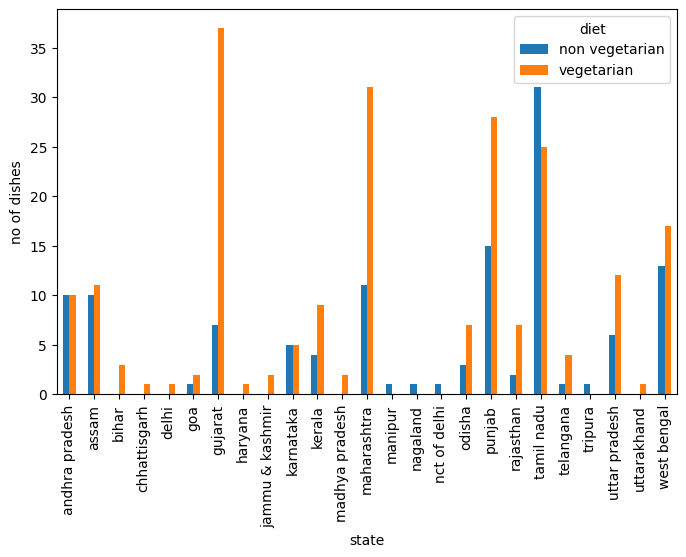

In [ ]:
# diet vs state
df.groupby('state')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()

# valid for gujarat 
# MH is okay for now

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14704\1114772368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))


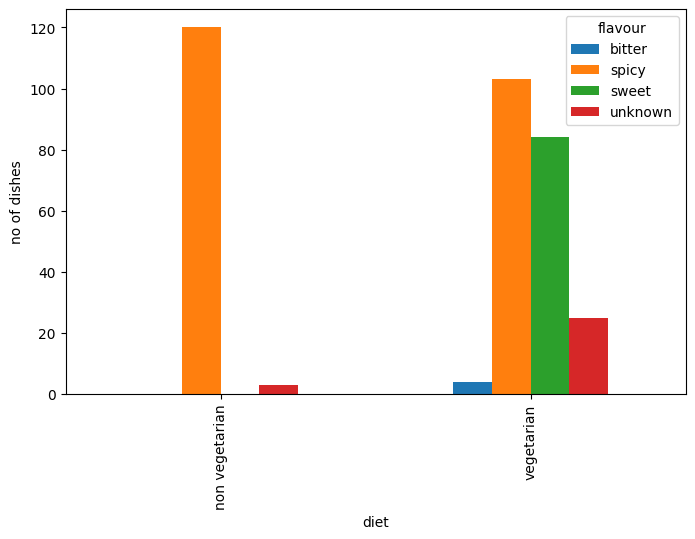

In [83]:
# diet vs flavour
df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel('no of dishes')
plt.show()

# non veg dishes are not sweet dishes at all

In [84]:
#total_time vs flavour
#total_time vs dish_type
#total_time vs region

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14704\2948203643.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='flavour'>

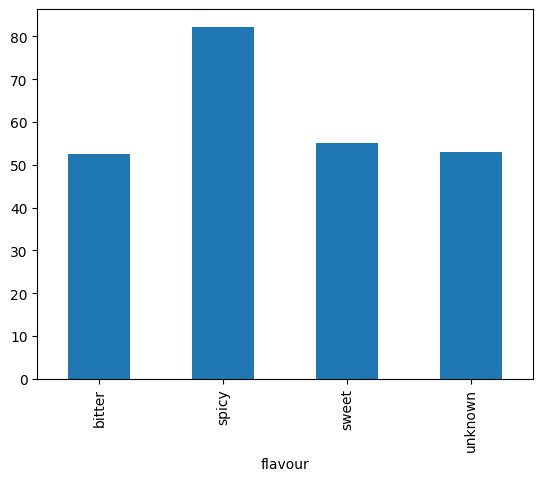

In [ ]:
#total_time vs flavour
df.groupby('flavour')['total_time'].mean().plot(kind='bar')

# valid spicy dishes take more time

<Axes: xlabel='dish_type'>

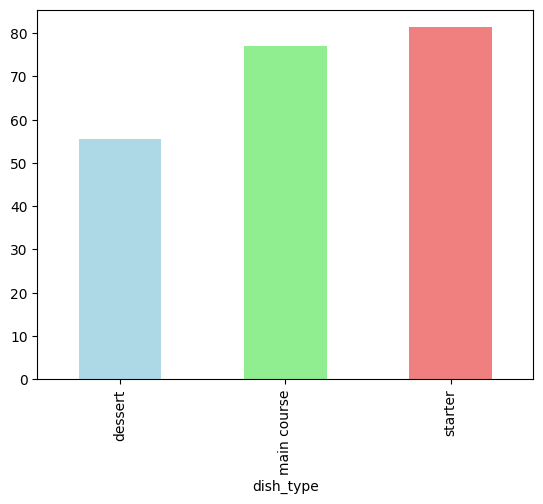

In [87]:
# total_time vs dish_type
df.groupby('dish_type')['total_time'].mean().plot(kind='bar',color=['lightblue','lightgreen','lightcoral'])

# valid generally starter take more time

<Axes: xlabel='region'>

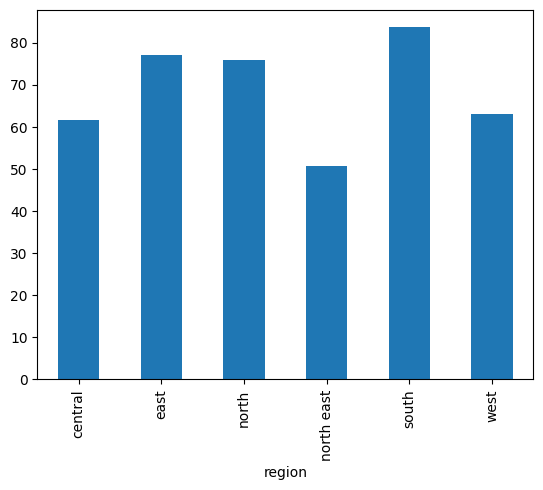

In [ ]:
#total_time vs region
df.groupby('region')['total_time'].mean().plot(kind='bar')

# valid coz we take 30+ non veg dishes from tamil nadu

In [ ]:
# flavour vs dish_type 
#2. flavour vs region 
#4. flavour vs diet

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14704\4182511109.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

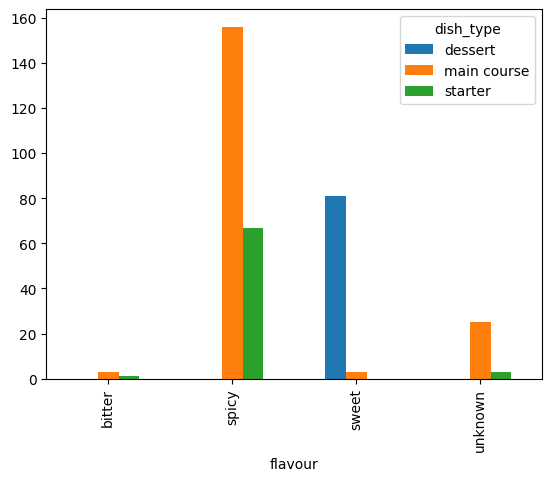

In [ ]:
# flavour vs dish_type 
df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')

# starter - spicy dominant
# main - spicy dominant
# dessert - sweet dominant

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14704\2140408214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

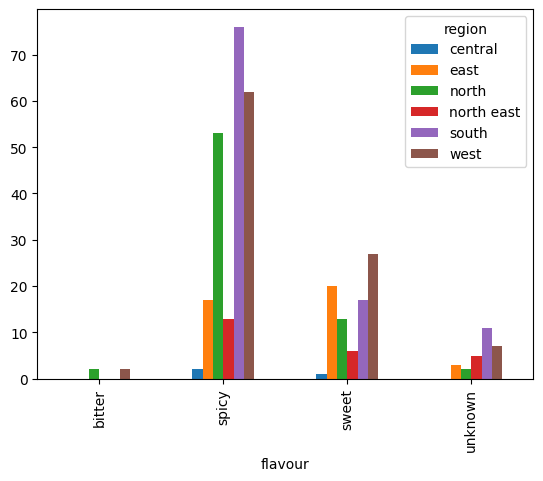

In [90]:
# flavour vs region
df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')

# spicy dominant in west,north, south regions

<Axes: xlabel='dish_type'>

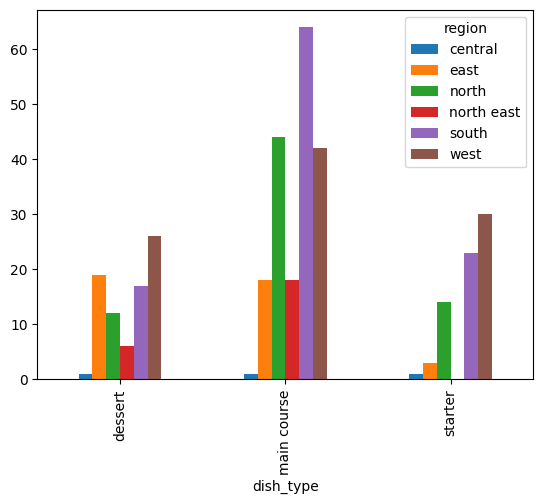

In [ ]:
#dish_type vs region
df.groupby('dish_type')['region'].value_counts().unstack().plot(kind='bar')

# northest doesn't like starter at all

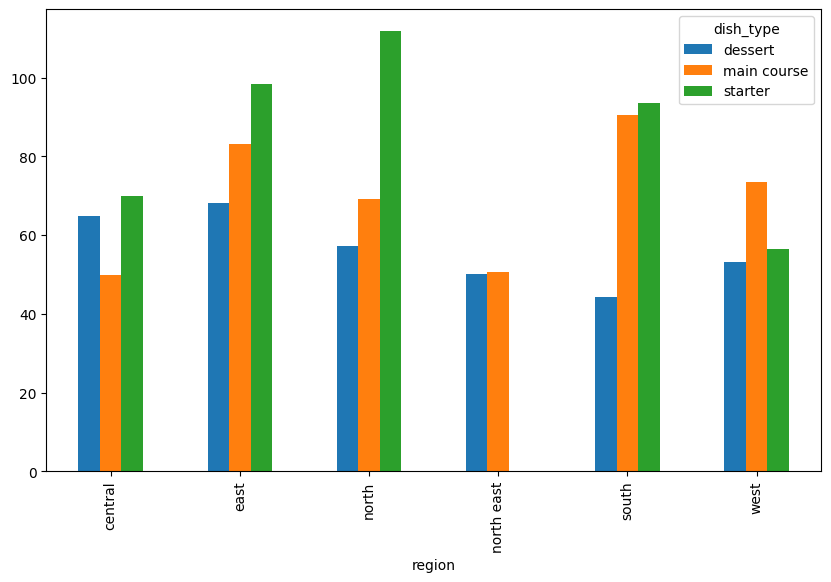

In [ ]:
# multivariate analysis (region, dish_type vs total_time)
pd.crosstab(df['region'], df['dish_type'],values=df['total_time'],aggfunc='mean').round(1).plot(kind='bar', figsize=(10,6))

plt.show()

# region wise which type of dish take more time 

In [93]:
df.to_csv('indian_food_final.csv', index=False)